In [1]:
from InstagramAPI import InstagramAPI
import pandas as pd
from pandas.io.json import json_normalize
import time
import matplotlib

Fail to import moviepy. Need only for Video upload.


In [2]:
def login_to_instagram(username, password):
    api = InstagramAPI(username, password)
    api.login()
    
    return api

api = login_to_instagram('me.talks','metalks')

Request return 405 error!
{'message': '', 'status': 'fail'}
Request return 404 error!
Login success!



In [3]:
def get_my_posts(api):
    '''Retrieve all posts from profile'''
    my_posts = []
    has_more_posts = True
    max_id= ''

    while has_more_posts:
        api.getSelfUserFeed(maxid=max_id)
        if api.LastJson['more_available'] is not True:
            has_more_posts = False #stop condition

        max_id = api.LastJson.get('next_max_id','')
        my_posts.extend(api.LastJson['items']) #merge lists
        time.sleep(2) # slows down to avoid flooding

        if has_more_posts:
            print(str(len(my_posts)) + ' posts retrieved so far...')

    print('Total posts retrieved: ' + str(len(my_posts)))
    
    return my_posts

my_posts = get_my_posts(api)

Total posts retrieved: 16


In [4]:
def get_posts_likers(api, my_posts):
    '''Retrieve all likers on all posts'''
    
    likers = []
    
    print('wait %.1f minutes' % (len(my_posts)*2/60.))
    for i in range(len(my_posts)):
        m_id = my_posts[i]['id']
        api.getMediaLikers(m_id)
        
        likers += [api.LastJson]
        
        # Include post_id in likers dict list
        likers[i]['post_id'] = m_id
        
        time.sleep(2)
    print('done')
    
    return likers


likers = get_posts_likers(api, my_posts)

def posts_likers_to_df(likers):
    '''Transforms likers list of dicts into pandas DataFrame'''
    
    # Normalize likers by getting the 'users' list and the post_id of each like
    df_likers = json_normalize(likers, 'users', ['post_id'])
    # df_likers = json_normalize(likers)
    print(df_likers)
    # Add 'content_type' column to know the rows are likes
    df_likers['content_type'] = 'like'
    
    return df_likers

df_likers = posts_likers_to_df(likers)
#df_likers

wait 0.5 minutes
done
             pk                  username                     full_name  \
0   23903795121             mr_farooqui_7           shahrukh farooqui 🔥   
1   36484047874  influencivepersonalities                         SMILE   
2    6191711462           swaggerniranjan  N҉I҉R҉A҉N҉J҉A҉N҉  K҉U҉M҉A҉R҉   
3   33733854760               __nishaj_gk                   🌱محمّد نشاج   
4    6878565805             elaene_silva_                  Elaene Silva   
5    8334310398          nightbeautyleila      Leila ‎ليلى Лейлачка ❤︎   
6    3296648638            tusharjain_157                   Tushar jain   
7    2520589349                _its_emyy_                         Emely   
8    1245689632             many_iph0nesx              📱📱iΡhοne Χ 👇 👇 👇   
9      34634022                nozomuhara              Nozomu (主望) Hara   
10   2520589349                _its_emyy_                         Emely   
11   1946621772             haojiiibadsha                 Vipin Walde➕❌   
12 

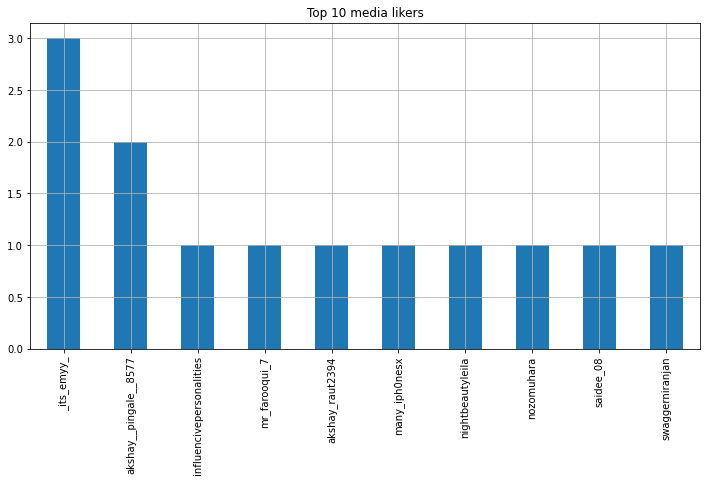

In [5]:
df_likers.username.value_counts()[:10].plot(kind='bar', title='Top 10 media likers', grid=True, figsize=(12,6))
